In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos, asin, sqrt, pi #calculate distance

# Preprocessing Tasks

### Loading all datasets

In [14]:
cases_train = pd.read_csv('../datasets/cases_2021_train.csv')
cases_test = pd.read_csv('../datasets/cases_2021_test.csv')
cases_location = pd.read_csv('../datasets/location_2021.csv')

## 1.1 Cleaning messy outcome labels

In [15]:
labels = {
    'Discharged': 'hospitalized', 'Discharged from hospital': 'hospitalized', 'Hospitalized': 'hospitalized', 'critical condition': 'hospitalized', 'discharge': 'hospitalized', 'discharged': 'hospitalized', 
    'Alive': 'nonhospitalized', 'Receiving Treatment': 'nonhospitalized', 'Stable': 'nonhospitalized', 'Under treatment': 'nonhospitalized', 'recovering at home 03.03.2020': 'nonhospitalized', 'released from quarantine': 'nonhospitalized', 'stable': 'nonhospitalized', 'stable condition': 'nonhospitalized', 
    'Dead': 'deceased', 'Death': 'deceased', 'Deceased': 'deceased', 'Died': 'deceased', 'death': 'deceased', 'died': 'deceased',
     'Recovered': 'recovered', 'recovered': 'recovered'
}

In [16]:
cases_train['outcome_group'] = cases_train['outcome'].map(labels)

In [17]:
cases_train = cases_train.drop(columns=['outcome'])

## 1.3 Exploratory Data Analysis 

### 1.3.1 train / test dataset

In [18]:
print('cases_2021_train.csv:')
stats_cases_train = cases_train.describe(include='all')
stats_cases_train = stats_cases_train.append(pd.DataFrame([cases_train.isna().sum()], index=['null'])) # add count of null values
stats_cases_train = stats_cases_train.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_train

cases_2021_train.csv:


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,23053,25484,205242,205845,205846.0,205846.0,205795,12402,187452,205846,205846
null,182793,180362,604,1,0.0,0.0,51,193444,18394,0,0
unique,129,2,193,50,NaN,NaN,138,4519,2828,2,4


In [19]:
print('cases_2021_test.csv')
stats_cases_test = cases_test.describe(include='all').round(2)
stats_cases_test = stats_cases_test.append(pd.DataFrame([cases_test.isna().sum()], index=['null'])) # add count of null values
stats_cases_test = stats_cases_test.iloc[[0,11,1]] # keep [count, null, unique]
stats_cases_test

cases_2021_test.csv


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
count,11374,12622,101091,101386,101387.0,101387.0,101364,6181,92227,101387,0.0
null,90013,88765,296,1,0.0,0.0,23,95206,9160,0,101387.0
unique,118,2,155,43,NaN,NaN,132,2438,2361,2,NaN


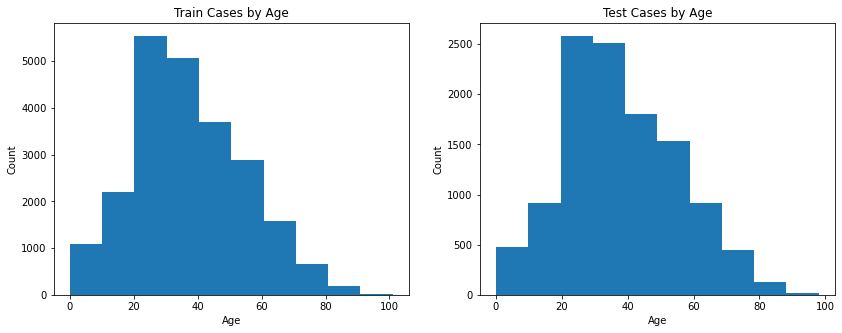

In [20]:
# age attribute
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(pd.to_numeric(cases_train['age'], errors='coerce'), bins=10)
plt.title('Train Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(pd.to_numeric(cases_test['age'], errors='coerce'), bins=10)
plt.title('Test Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.savefig('../plots/task-1.3/Train_Test_Age.svg')

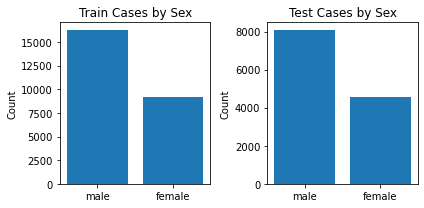

In [21]:
# sex attribute
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.bar(cases_train['sex'].value_counts().index,cases_train['sex'].value_counts())
plt.title('Train Cases by Sex')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(cases_test['sex'].value_counts().index,cases_test['sex'].value_counts())
plt.title('Test Cases by Sex')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('../plots/task-1.3/Train_Test_Sex.svg')

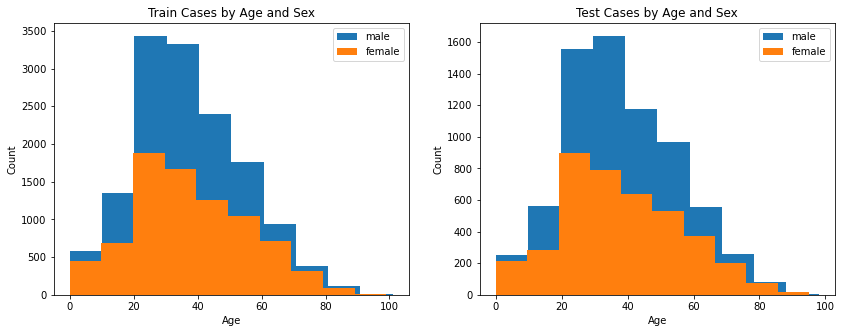

In [22]:
# age & sex attribute
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
values = cases_train[['age', 'sex']]
plt.hist(pd.to_numeric(values.loc[values['sex']=='male', 'age'], errors='coerce'), bins=10)
plt.hist(pd.to_numeric(values.loc[values['sex']=='female', 'age'], errors='coerce'), bins=10)
plt.title('Train Cases by Age and Sex')
plt.legend(['male', 'female'])
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
values = cases_test[['age', 'sex']]
plt.hist(pd.to_numeric(values.loc[values['sex']=='male', 'age'], errors='coerce'), bins=10)
plt.hist(pd.to_numeric(values.loc[values['sex']=='female', 'age'], errors='coerce'), bins=10)
plt.title('Test Cases by Age and Sex')
plt.legend(['male', 'female'])
plt.xlabel('Age')
plt.ylabel('Count')

plt.savefig('../plots/task-1.3/Train_Test_Age_Sex.svg')

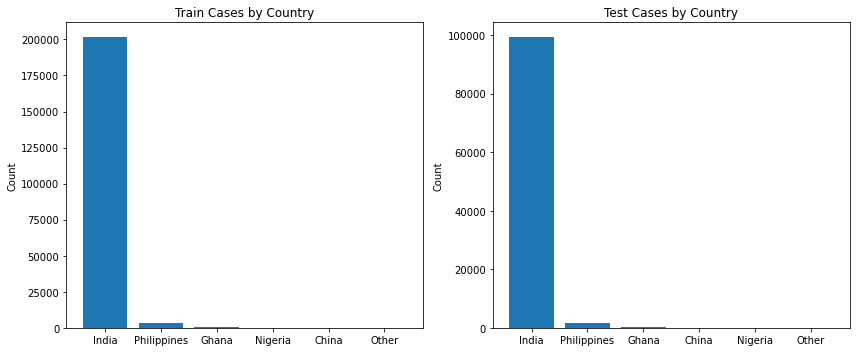

In [23]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>100 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('Train Cases by Country')
plt.ylabel('Count')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.country>60 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('Test Cases by Country')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('../plots/task-1.3/Train_Test_Country.svg')

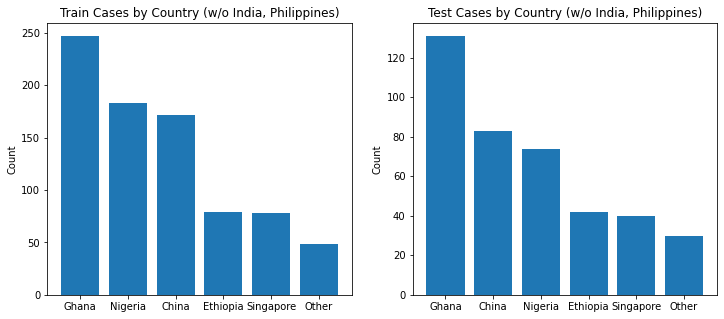

In [24]:
# country attribute
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
values = pd.DataFrame(cases_train['country'].value_counts()).reset_index()
values = values.drop(index=[0, 1])
values['index'] = values.apply(lambda x: x['index'] if x.country>60 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('Train Cases by Country (w/o India, Philippines)')
plt.ylabel('Count')

plt.subplot(1,2,2)
values = pd.DataFrame(cases_test['country'].value_counts()).reset_index()
values = values.drop(index=[0, 1])
values['index'] = values.apply(lambda x: x['index'] if x.country>30 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['country'])
plt.title('Test Cases by Country (w/o India, Philippines)')
plt.ylabel('Count')
#plt.show()
plt.savefig('../plots/task-1.3/Train_Test_Country2.svg')

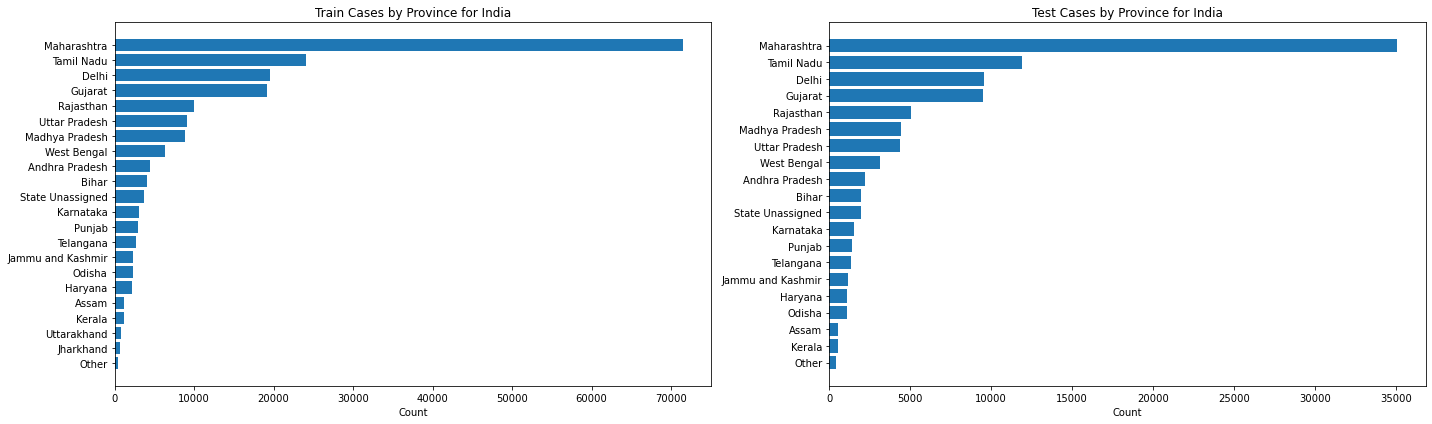

In [25]:
# province attribute - India
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
values = cases_train[cases_train['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('Train Cases by Province for India')
plt.xlabel('Count')

plt.subplot(1,2,2)
values = cases_test[cases_test['country']=='India']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>500 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('Test Cases by Province for India')
plt.xlabel('Count')
plt.tight_layout()

plt.savefig('../plots/task-1.3/Train_Test_Provinces_India.svg')

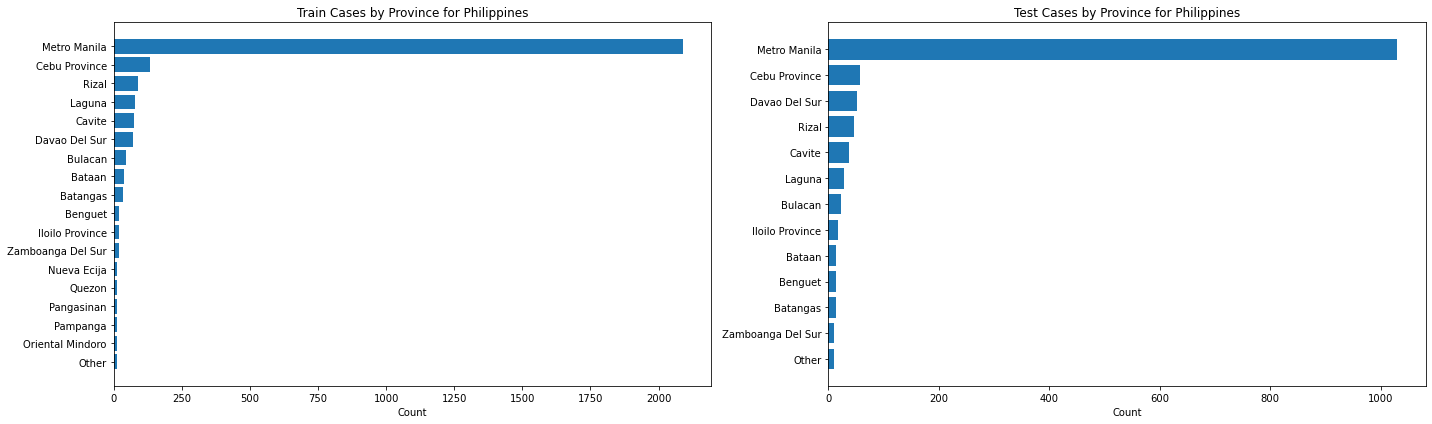

In [26]:
# province attribute - Philippines
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
values = cases_train[cases_train['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('Train Cases by Province for Philippines')
plt.xlabel('Count')

plt.subplot(1,2,2)
values = cases_test[cases_test['country']=='Philippines']
values = pd.DataFrame(values['province'].value_counts().sort_values(ascending=True)).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x.province>10 else 'Other', axis=1)#sumarize others
plt.barh(values['index'], values['province'])
plt.title('Test Cases by Province for Philippines')
plt.xlabel('Count')
plt.tight_layout()

plt.savefig('../plots/task-1.3/Train_Test_Provinces_Philippines.svg')

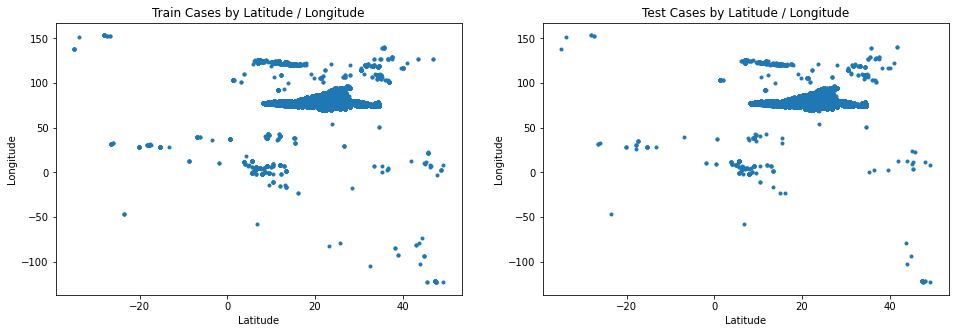

In [27]:
# latitude / longitude attribute
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(cases_train['latitude'], cases_train['longitude'], '.')
plt.title('Train Cases by Latitude / Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.subplot(1,2,2)
plt.plot(cases_test['latitude'], cases_test['longitude'], '.')
plt.title('Test Cases by Latitude / Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.savefig('../plots/task-1.3/Train_Test_Lat_Lon.svg')

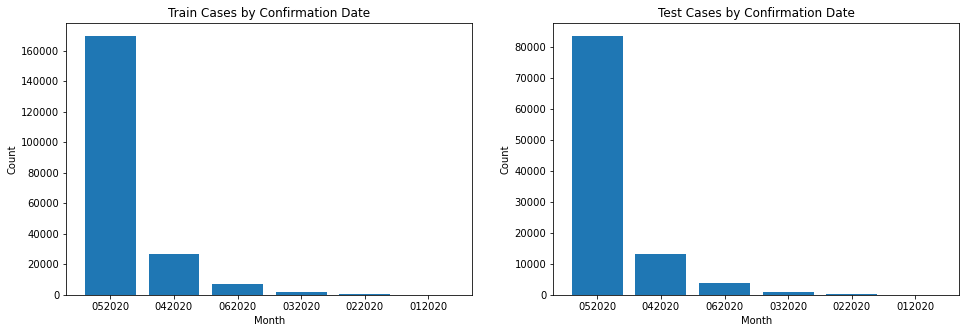

In [28]:
# date_confirmation attribute
# add month attribute
cases_train['month'] = cases_train.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_train = cases_train.replace("", np.NaN)
cases_test['month'] = cases_test.apply(lambda x: str(x.date_confirmation)[3:5] + str(x.date_confirmation)[6:10], axis=1)
cases_test = cases_test.replace("", np.NaN)

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(cases_train['month'].value_counts().index, cases_train['month'].value_counts())
plt.title('Train Cases by Confirmation Date')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(cases_test['month'].value_counts().index, cases_test['month'].value_counts())
plt.title('Test Cases by Confirmation Date')
plt.xlabel('Month')
plt.ylabel('Count')

plt.savefig('../plots/task-1.3/Train_Test_Date.svg')

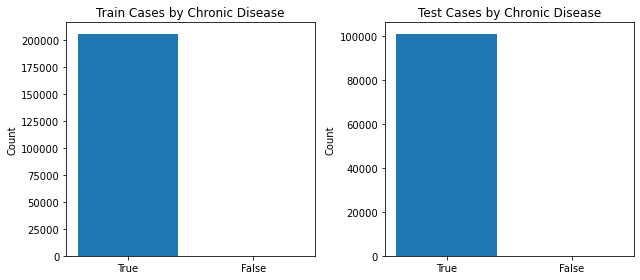

In [29]:
# chronic disease  attribute
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.bar(['True','False'],cases_train['chronic_disease_binary'].value_counts())
plt.title('Train Cases by Chronic Disease')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(['True','False'],cases_test['chronic_disease_binary'].value_counts())
plt.title('Test Cases by Chronic Disease')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('../plots/task-1.3/Train_Test_Chronic_Disease.svg')

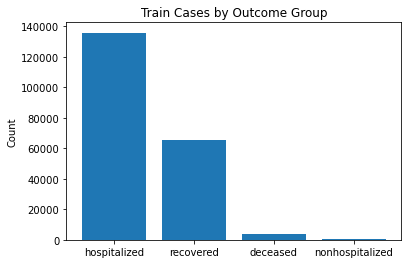

In [30]:
#outcome group attribute
plt.bar(cases_train['outcome_group'].value_counts().index,cases_train['outcome_group'].value_counts())
plt.title('Train Cases by Outcome Group')
plt.ylabel('Count')

plt.savefig('../plots/task-1.3/Train_Test_Outcome_Group.svg')

### 1.3.2 location dataset

In [31]:
stats_cases_location = cases_location.describe(include="all").round(2)
stats_cases_location = stats_cases_location.append(pd.DataFrame([cases_location.isna().sum()], index=['null'])) # add count of null values
stats_cases_location = stats_cases_location.iloc[[0,11,1, 4, 5, 6, 10]] # keep [count, null, unique]
stats_cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
count,3830,4004,4004,3915.00,3915.00,4004.00,4004.00,729.00,729.00,4004,3914.00,3956.00
null,174,0,0,89.00,89.00,0.00,0.00,3275.00,3275.00,0,90.00,48.00
unique,593,196,9,NaN,NaN,NaN,NaN,NaN,NaN,4004,NaN,NaN
mean,NaN,NaN,NaN,35.82,-71.33,32300.36,726.71,100300.81,36416.57,NaN,8171.70,2.75
std,NaN,NaN,NaN,13.23,54.89,166884.39,4083.39,274010.22,218469.87,NaN,3915.61,42.19
min,NaN,NaN,NaN,-52.37,-178.12,0.00,0.00,0.00,0.00,NaN,0.00,0.00
max,NaN,NaN,NaN,71.71,178.06,4611392.00,111489.00,3014226.00,4251829.00,NaN,35307.70,2648.84


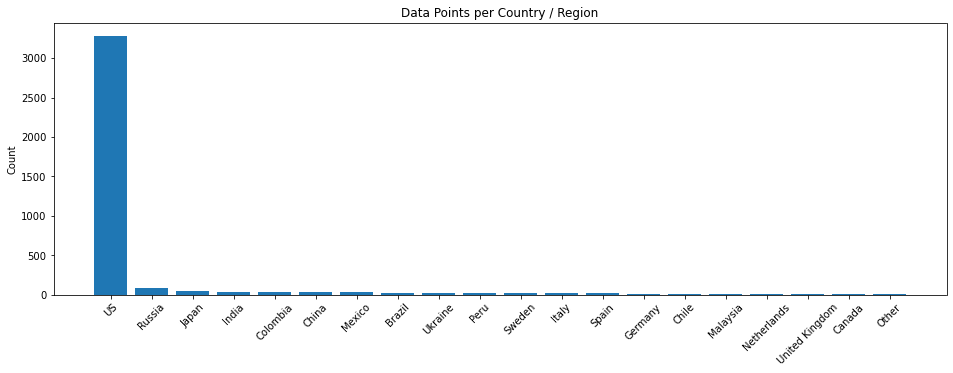

In [32]:
# country / region attribute
plt.figure(figsize=(16,5))
values = pd.DataFrame(cases_location['Country_Region'].value_counts()).reset_index()
values['index'] = values.apply(lambda x: x['index'] if x['Country_Region']>15 else 'Other', axis=1)# sumarize others
plt.bar(values['index'], values['Country_Region'])
plt.title('Data Points per Country / Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.savefig('../plots/task-1.3/Location_Region.svg')

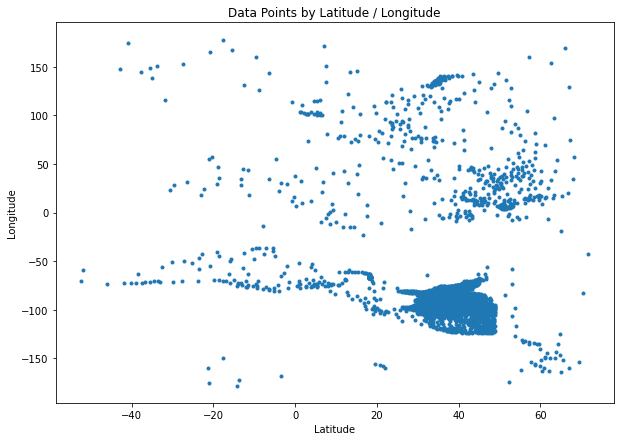

In [33]:
# latitude / longitude attribute
plt.figure(figsize=(10,7))
plt.plot(cases_location['Lat'], cases_location['Long_'], '.')
plt.title('Data Points by Latitude / Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.savefig('../plots/task-1.3/Location_Lat_Lon.svg')

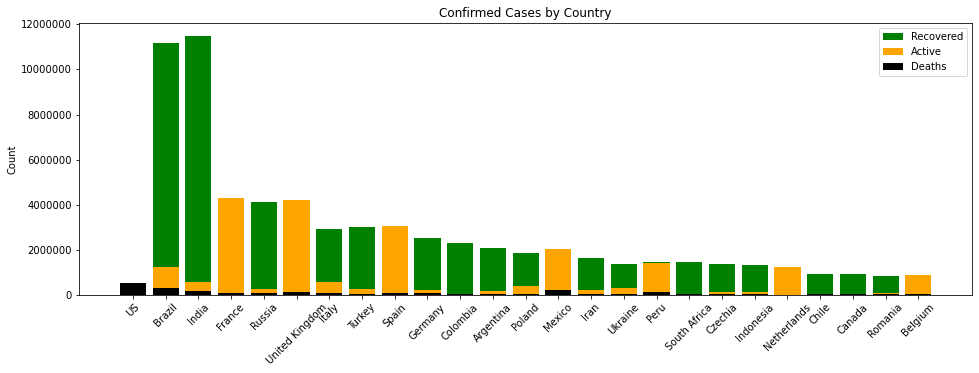

In [34]:
# confirmed, recovered, active, deaths attribute
values = cases_location.groupby('Country_Region').sum()
values = values.nlargest(25, 'Confirmed') #get Top 25 countries

plt.figure(figsize=(16,5))
plt.bar(values.index, values['Recovered'], color='green')
plt.bar(values.index, values['Active'], color='orange')
plt.bar(values.index, values['Deaths'],  color='black')
plt.xticks(rotation=45)
plt.legend(['Recovered', 'Active', 'Deaths'])
plt.title('Confirmed Cases by Country')
plt.ylabel('Count')
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

plt.savefig('../plots/task-1.3/Location_Confirmed.svg')

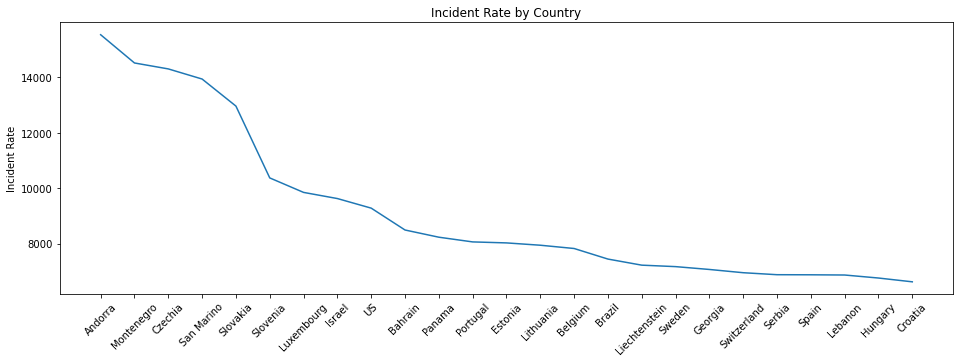

In [35]:
# incident rate attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Incident_Rate')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Incident_Rate'])
plt.xticks(rotation=45)
plt.title('Incident Rate by Country')
plt.ylabel('Incident Rate')

plt.savefig('../plots/task-1.3/Location_Incident_Rate.svg')

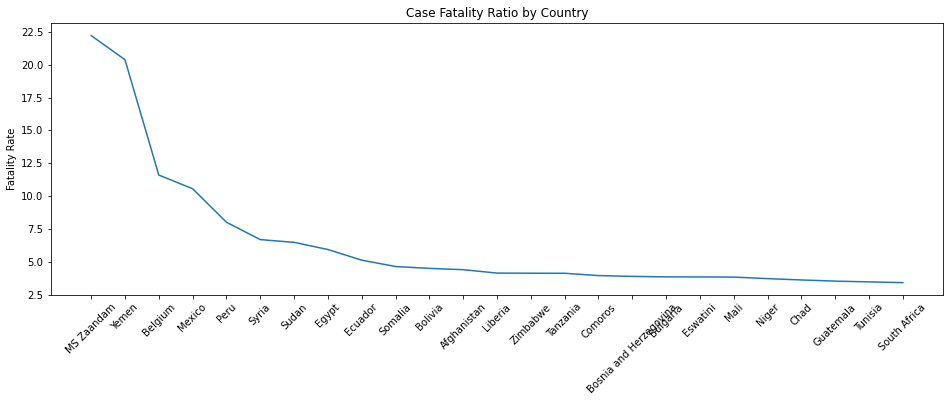

In [36]:
# case_fatality attribute
values = cases_location.groupby('Country_Region').mean()
values = values.nlargest(25, 'Case_Fatality_Ratio')

plt.figure(figsize=(16,5))
plt.plot(values.index, values['Case_Fatality_Ratio'])
plt.xticks(rotation=45)
plt.title('Case Fatality Ratio by Country')
plt.ylabel('Fatality Rate')

plt.savefig('../plots/task-1.3/Location_Fatality_Rate.svg')